In [1]:
from sympy import *
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

In [2]:
m = symbols('m') # mass
l = symbols('l') #length of arm
g = symbols('g') #gravity
t = symbols('t') # time
Jx = symbols('Jx') # Moment of Inertia X-component
Jy = symbols('Jy') # Moment of Inertia Y-component
Jz = symbols('Jz') # Moment of Inertia Z-component

Fg = Matrix([0,0,-m*9.81])

p_x, p_y, p_z = symbols('p_x, p_y, p_z') # components of position 
psi, theta, phi = symbols('psi, theta, phi') # yaw, pitch and roll 
v_x, v_y, v_z = symbols('v_x, v_y, v_z') # components of linear velocity
w_x, w_y, w_z = symbols('w_x, w_y, w_z') # components of angular velocity 

v_in_body = Matrix([v_x, v_y, v_z])
w_in_body = Matrix([w_x, w_y, w_z])

Rz = Matrix([[cos(psi), -sin(psi), 0], [sin(psi), cos(psi), 0], [0, 0, 1]])
Ry = Matrix([[cos(theta), 0, sin(theta)], [0, 1, 0], [-sin(theta), 0, cos(theta)]])
Rx = Matrix([[1, 0, 0], [0, cos(phi), -sin(phi)], [0, sin(phi), cos(phi)]])
R_body_in_world = Rz @ Ry @ Rx


R_body_in_world

Matrix([
[cos(psi)*cos(theta), sin(phi)*sin(theta)*cos(psi) - sin(psi)*cos(phi),  sin(phi)*sin(psi) + sin(theta)*cos(phi)*cos(psi)],
[sin(psi)*cos(theta), sin(phi)*sin(psi)*sin(theta) + cos(phi)*cos(psi), -sin(phi)*cos(psi) + sin(psi)*sin(theta)*cos(phi)],
[        -sin(theta),                              sin(phi)*cos(theta),                               cos(phi)*cos(theta)]])

In [3]:
ex = Matrix([[1], [0], [0]])
ey = Matrix([[0], [1], [0]])
ez = Matrix([[0], [0], [1]])
M = simplify(Matrix.hstack((Ry @ Rx).T @ ez, Rx.T @ ey, ex).inv(), full=True)

f1, f2, f3, f4 = symbols("f1, f2, f3, f4")
T1, T2, T3, T4 = symbols("T1, T2, T3, T4")

F1 = Matrix([0,0,f1]) # force from +x rotor
F2 = Matrix([0,0,f2]) # force from +y rotor
F3 = Matrix([0,0,f3]) # force from -x rotor 
F4 = Matrix([0,0,f4]) # force from -y rotor

F_total = F1 + F2 + F3 + F4

F_total

Matrix([
[                0],
[                0],
[f1 + f2 + f3 + f4]])

In [4]:
T1_moment = Matrix([0,0,T1]) # moment from +x rotor
T2_moment = Matrix([0,0,T2]) # moment from +y rotor
T3_moment = Matrix([0,0,T3]) # moment from -x rotor 
T4_moment = Matrix([0,0,T4]) # moment from -y rotor

R1 = Matrix([l,0,0]) # position of +x rotor
R2 = Matrix([0,l,0]) # position of +y rotor
R3 = Matrix([-l,0,0]) # position of -x rotor
R4 = Matrix([0,-l,0]) # position of -y rotor

T1_Torque = R1.cross(F1)
T2_Torque = R2.cross(F2)
T3_Torque = R3.cross(F3)
T4_Torque = R4.cross(F4)


Moment_of_Inertia = Matrix([[Jx,   0,   0],
                            [  0, Jy,   0],
                            [  0,   0, Jz]])



R_body_in_world.T @ Fg

Matrix([
[          9.81*m*sin(theta)],
[-9.81*m*sin(phi)*cos(theta)],
[-9.81*m*cos(phi)*cos(theta)]])

In [5]:
Force_Body = (R_body_in_world.T @ Fg) + F_total
Torque = (T1_moment + T2_moment + T3_moment + T4_moment + T1_Torque + T2_Torque + T3_Torque + T4_Torque)

EoM = Matrix.vstack(
    R_body_in_world @ v_in_body,
    M @ w_in_body,
    (1 / m) * (Force_Body - w_in_body.cross(m * v_in_body)),
    Moment_of_Inertia.inv() @ (Torque - w_in_body.cross(Moment_of_Inertia @ w_in_body)),
)

EoM = simplify(EoM, full=True) 
EoM

Matrix([
[v_x*cos(psi)*cos(theta) + v_y*(sin(phi)*sin(theta)*cos(psi) - sin(psi)*cos(phi)) + v_z*(sin(phi)*sin(psi) + sin(theta)*cos(phi)*cos(psi))],
[v_x*sin(psi)*cos(theta) + v_y*(sin(phi)*sin(psi)*sin(theta) + cos(phi)*cos(psi)) - v_z*(sin(phi)*cos(psi) - sin(psi)*sin(theta)*cos(phi))],
[                                                                      -v_x*sin(theta) + v_y*sin(phi)*cos(theta) + v_z*cos(phi)*cos(theta)],
[                                                                                                 (w_y*sin(phi) + w_z*cos(phi))/cos(theta)],
[                                                                                                              w_y*cos(phi) - w_z*sin(phi)],
[                                                                                  w_x + w_y*sin(phi)*tan(theta) + w_z*cos(phi)*tan(theta)],
[                                                                                                      v_y*w_z - v_z*w_y + 9.81*sin(theta)],
[   

In [6]:
#Test Case 2: Circle
#initial conditions



r = 2 #m
v = 0.5 #m/s
mass = 1.6 #kg
ang_v = v/r #radians/s
init_pitch = -np.arctan(r*ang_v**2/9.81) #radians
g = 9.81

lift = mass*g/np.cos(init_pitch)

omegax0 = ang_v*np.sin(-init_pitch)
omegaz0 = ang_v*np.cos(-init_pitch)


J_x = 0.0032135
J_y = 0.0032135
J_z = 0.00248433

T_y_0 = J_x*omegax0*omegaz0 - J_z*omegax0*omegaz0
print(T_y_0, J_x, J_z)

px0 = 2
py0 = 0
pz0 = 1
vx0 = 0
vy0 = 0.5
vz0 = 0
psi0 = 0
theta0 = init_pitch
phi0 = 0
wx0 = omegax0
wy0 = 0
wz0 = omegaz0

b1 = 1.140*10**(-7)
k1 = 2.980*10**(-6)


EoM_circle_history = []


timestep = 0.01

t = 0


arm_length = 0.150
center_width = 0.08

l1 = arm_length + np.sqrt(2*(center_width/2)**2)



w1_circle, w2_circle, w3_circle, w4_circle = symbols('w1_circle, w2_circle, w3_circle, w4_circle')


f_z_eq = Eq(k1 *(w1_circle**2 + w2_circle**2 + w3_circle**2 + w4_circle**2),lift)
T_x_eq = Eq(k1 * l1 * (-w2_circle**2 + w4_circle**2),0)
T_y_eq = Eq(k1 * l1 * (-w1_circle**2 + w3_circle**2),-T_y_0)
T_z_eq = Eq(b1 * (-w1_circle**2 + w2_circle**2 - w3_circle**2 + w4_circle**2),0)


solve((T_x_eq,T_y_eq,T_z_eq,f_z_eq), (w1_circle, w2_circle, w3_circle, w4_circle))

5.806030440623273e-07 0.0032135 0.00248433


[(-1147.55648556277, -1147.55628008501, -1147.55607460721, -1147.55628008501),
 (-1147.55648556277, -1147.55628008501, -1147.55607460721, 1147.55628008501),
 (-1147.55648556277, -1147.55628008501, 1147.55607460721, -1147.55628008501),
 (-1147.55648556277, -1147.55628008501, 1147.55607460721, 1147.55628008501),
 (-1147.55648556277, 1147.55628008501, -1147.55607460721, -1147.55628008501),
 (-1147.55648556277, 1147.55628008501, -1147.55607460721, 1147.55628008501),
 (-1147.55648556277, 1147.55628008501, 1147.55607460721, -1147.55628008501),
 (-1147.55648556277, 1147.55628008501, 1147.55607460721, 1147.55628008501),
 (1147.55648556277, -1147.55628008501, -1147.55607460721, -1147.55628008501),
 (1147.55648556277, -1147.55628008501, -1147.55607460721, 1147.55628008501),
 (1147.55648556277, -1147.55628008501, 1147.55607460721, -1147.55628008501),
 (1147.55648556277, -1147.55628008501, 1147.55607460721, 1147.55628008501),
 (1147.55648556277, 1147.55628008501, -1147.55607460721, -1147.556280085

In [7]:

#initial try - results in helical rise
w1 = 1147.55607460721
w2 = 1147.55628008501
w3 = 1147.55648556277
w4 = 1147.55628008501

#no ty0, results in failure
# w1 = 1147.55628008501
# w2 = 1147.55628008501
# w3 = 1147.55628008501
# w4 = 1147.55628008501
# negative ty0
# w1 = 1147.55648556277
# w2 = 1147.55628008501
# w3 = 1147.55607460721
# w4 = 1147.55628008501


f1_circle = k1 * w1**2
f2_circle = k1 * w2**2
f3_circle = k1 * w3**2
f4_circle = k1 * w4**2

T1_circle = -b1 * w1**2
T2_circle = b1 * w2**2
T3_circle = -b1 * w3**2
T4_circle = b1 * w4**2




In [8]:
EoM_circle = EoM.subs({f1:f1_circle,f2:f2_circle,f3:f3_circle,f4:f4_circle,g:9.81,Jx:0.0032135,Jy:0.0032135,Jz:0.00248433,l:l1,m:1.6,T1:T1_circle,T2:T2_circle,T3:T3_circle,T4:T4_circle})
display(EoM_circle)
EoM_circle_f = lambdify((psi,theta,phi,v_x, v_y, v_z, w_x,w_y,w_z), EoM_circle, "numpy")

print(np.array([px0,py0,pz0,psi0,theta0,phi0,vx0,vy0,vz0,wx0,wy0,wz0]))


Matrix([
[v_x*cos(psi)*cos(theta) + v_y*(sin(phi)*sin(theta)*cos(psi) - sin(psi)*cos(phi)) + v_z*(sin(phi)*sin(psi) + sin(theta)*cos(phi)*cos(psi))],
[v_x*sin(psi)*cos(theta) + v_y*(sin(phi)*sin(psi)*sin(theta) + cos(phi)*cos(psi)) - v_z*(sin(phi)*cos(psi) - sin(psi)*sin(theta)*cos(phi))],
[                                                                      -v_x*sin(theta) + v_y*sin(phi)*cos(theta) + v_z*cos(phi)*cos(theta)],
[                                                                                                 (w_y*sin(phi) + w_z*cos(phi))/cos(theta)],
[                                                                                                              w_y*cos(phi) - w_z*sin(phi)],
[                                                                                  w_x + w_y*sin(phi)*tan(theta) + w_z*cos(phi)*tan(theta)],
[                                                                                                      v_y*w_z - v_z*w_y + 9.81*sin(theta)],
[   

[ 2.          0.          1.          0.         -0.01274141  0.
  0.          0.5         0.          0.00318527  0.          0.24997971]


In [9]:
#EoM_circle_history.clear()
EoM_circle_history.append(np.array([px0,py0,pz0,psi0,theta0,phi0,vx0,vy0,vz0,wx0,wy0,wz0]))
t = 0

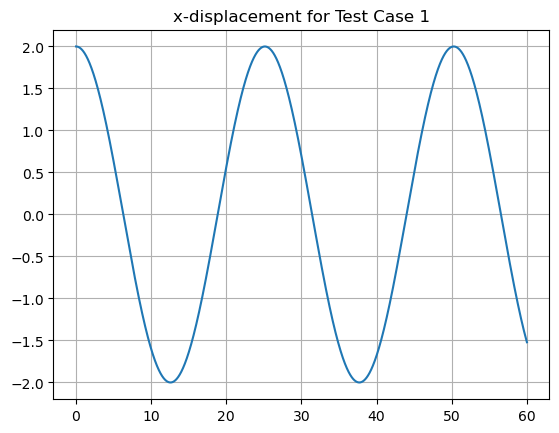

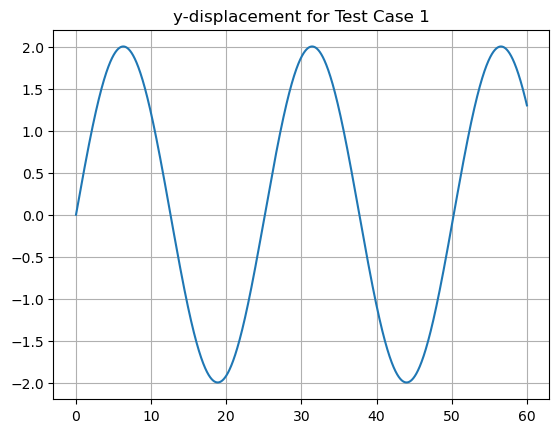

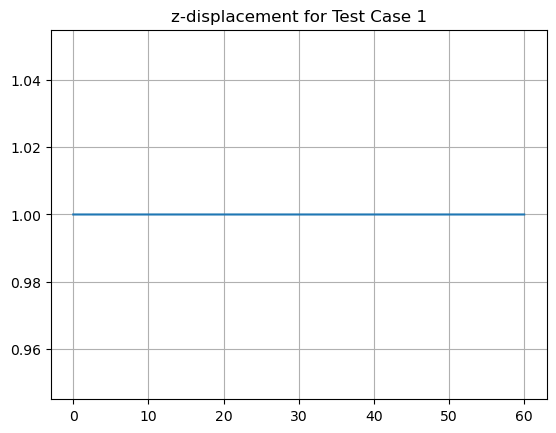

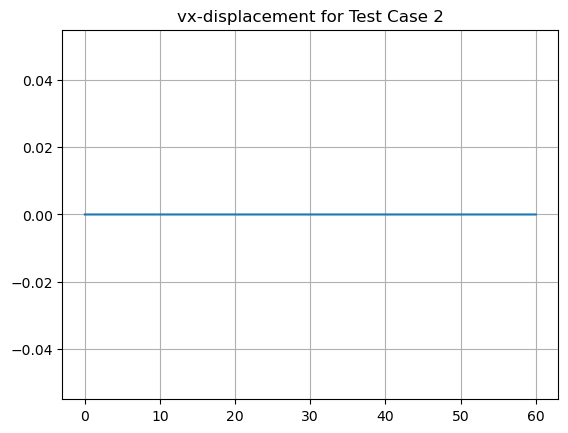

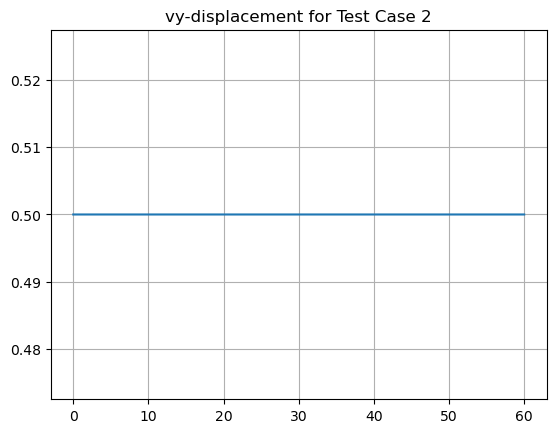

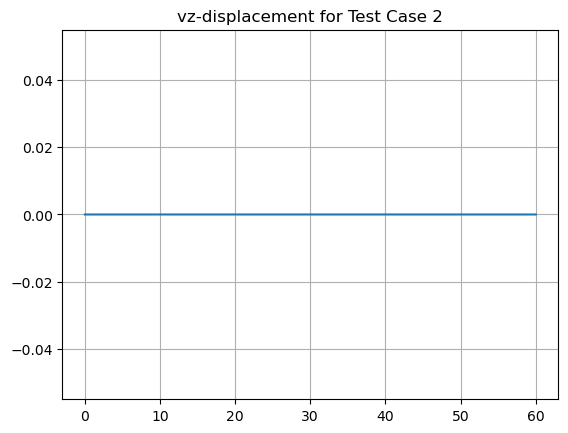

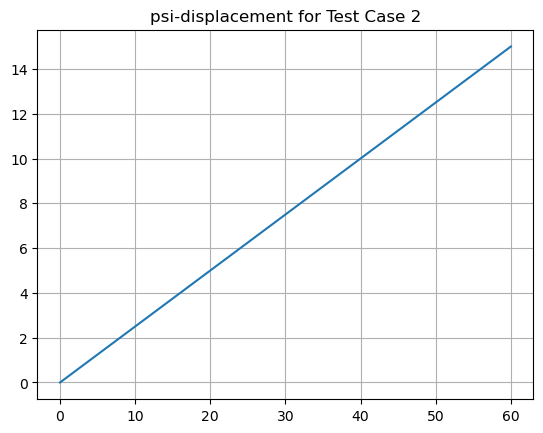

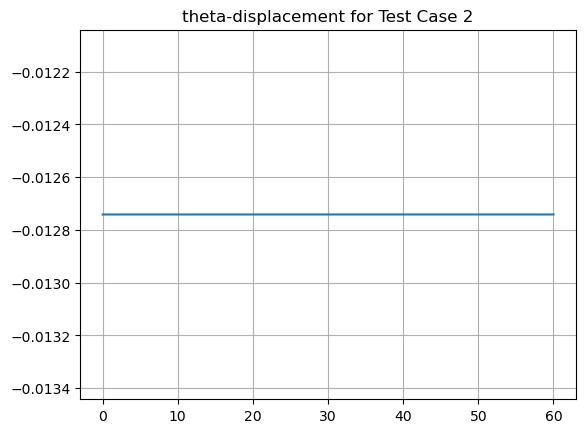

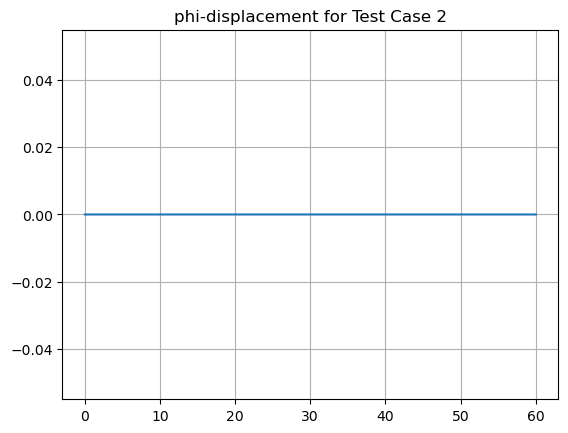

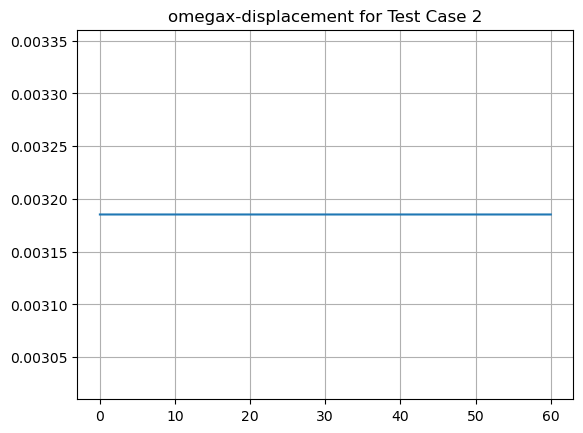

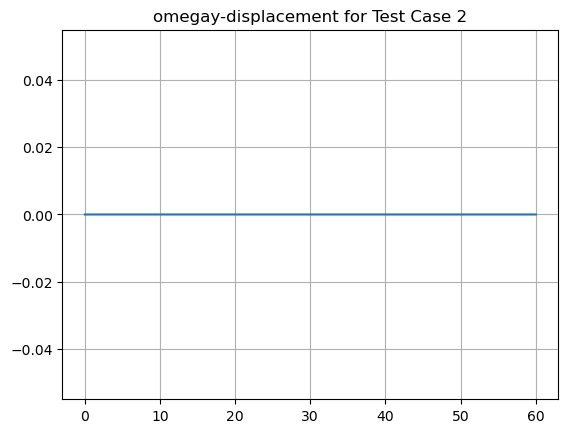

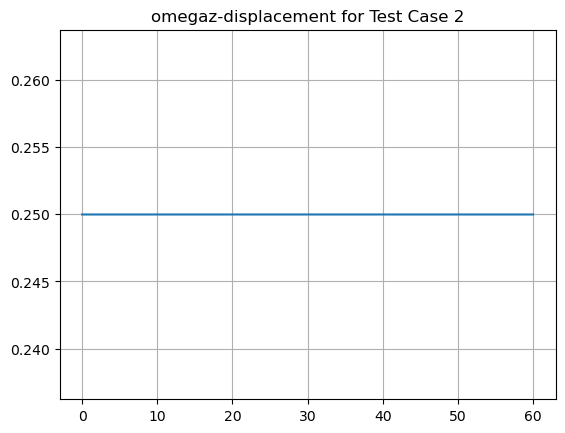

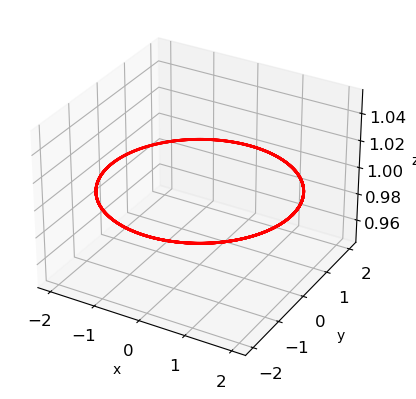

In [17]:
while (t < 60):
    dEoM = EoM_circle_f(EoM_circle_history[-1][3],EoM_circle_history[-1][4],EoM_circle_history[-1][5],
                 EoM_circle_history[-1][6],EoM_circle_history[-1][7],EoM_circle_history[-1][8],
                EoM_circle_history[-1][9],EoM_circle_history[-1][10],EoM_circle_history[-1][11])
    
    #dEoM = np.reshape(dEoM, (12))
    dEoMT = dEoM.T[0]
    #print(dEoMT)
    newEoM = EoM_circle_history[-1]+np.round(dEoMT, decimals = 5)*timestep
    #print(newEoM)
    #print('\n')
    EoM_circle_history.append(newEoM)
    t = timestep + t
    #print(t)
    if t%0.2==0:
        print(t)

EoM_circle_history = np.array(EoM_circle_history)
px_history = EoM_circle_history[:,0]
py_history = EoM_circle_history[:,1]
pz_history = EoM_circle_history[:,2]


t_vals = np.linspace(0, 6001, 6002)

plt.plot(t_vals/100, px_history, label = "x-displacement")
plt.title("x-displacement for Test Case 1")
plt.grid()
plt.show()

plt.plot(t_vals/100, py_history, label = "y-displacement")
plt.title("y-displacement for Test Case 1")
plt.grid()
plt.show()

plt.plot(t_vals/100, pz_history, label = "z-displacement")
plt.title("z-displacement for Test Case 1")
plt.grid()
plt.show()

vx_history = EoM_circle_history[:,6]
vy_history = EoM_circle_history[:,7]
vz_history = EoM_circle_history[:,8]


plt.plot(t_vals/100, vx_history, label = "vx-change")
plt.title("vx-displacement for Test Case 2")
plt.grid()
plt.show()

plt.plot(t_vals/100, vy_history, label = "vy-change")
plt.title("vy-displacement for Test Case 2")
plt.grid()
plt.show()

plt.plot(t_vals/100, vz_history, label = "vz-change")
plt.title("vz-displacement for Test Case 2")
plt.grid()
plt.show()


psi_history = EoM_circle_history[:,3]
theta_history = EoM_circle_history[:,4]
phi_history = EoM_circle_history[:,5]


plt.plot(t_vals/100, psi_history, label = "vx-change")
plt.title("psi-displacement for Test Case 2")
plt.grid()
plt.show()

plt.plot(t_vals/100, theta_history, label = "vy-change")
plt.title("theta-displacement for Test Case 2")
plt.grid()
plt.show()

plt.plot(t_vals/100, phi_history, label = "vz-change")
plt.title("phi-displacement for Test Case 2")
plt.grid()
plt.show()


omegax_history = EoM_circle_history[:,9]
omegay_history = EoM_circle_history[:,10]
omegaz_history = EoM_circle_history[:,11]


plt.plot(t_vals/100, omegax_history, label = "omegax-change")
plt.title("omegax-displacement for Test Case 2")
plt.grid()
plt.show()

plt.plot(t_vals/100, omegay_history, label = "omegay-change")
plt.title("omegay-displacement for Test Case 2")
plt.grid()
plt.show()

plt.plot(t_vals/100, omegaz_history, label = "omegaz-change")
plt.title("omegaz-displacement for Test Case 2")
plt.grid()
plt.show()
fig = plt.figure()
ax = plt.axes(projection='3d')
#ax.plot3D(px_history, py_history, pz_history, linewidth=1, color='red') 
ax.scatter(px_history, py_history, pz_history, s=1, color='red', marker = 'o')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.grid()
ax.tick_params(labelsize=12)

(-2.2000003500000025,
 2.200000749999998,
 -2.197499629999998,
 2.2025010300000005)

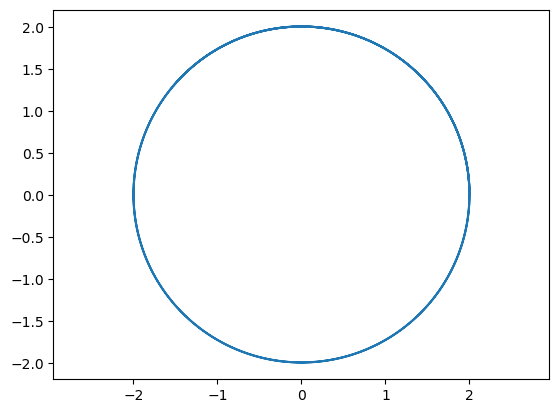

In [14]:
plt.plot(px_history, py_history, label = "y-displacement")
plt.axis('equal')

-3.698450372997472e-12